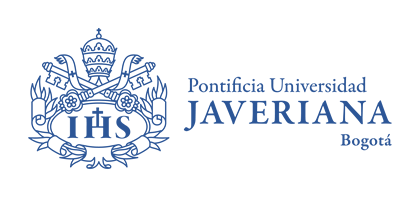

# Tecnologías emergentes - Taller SVM

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Alejandro Enrique Suárez Acosta

# Importando Librerias

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


# Carga de datos

In [24]:
dataset = pd.read_csv('WinnipegDataset.txt')

In [28]:
y_data = pd.DataFrame(dataset["label"].unique(), columns=["label"])
y_data

,label
0,1
1,2
2,3
3,4
4,5
5,6
6,7


# Análisis exploratorio de datos
Se realiza un análisis exploratorio de los datos para identificar la relación entre las variables y la variable objetivo, en este caso se elabora un mapa de calor para identificar la correlación entre las variables.

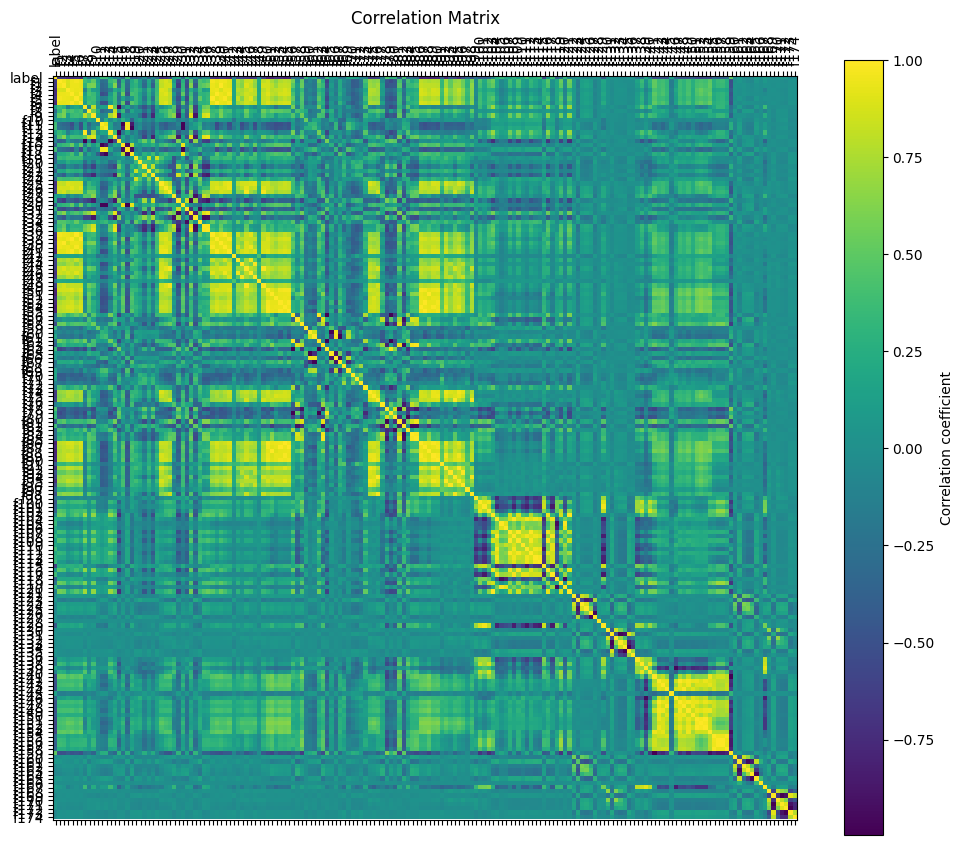

In [29]:
def plot_correlation_matrix(dataset):
    correlation_matrix = dataset.corr()
    plt.figure(figsize=(12, 10))
    plt.matshow(correlation_matrix, fignum=1)
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.colorbar(label='Correlation coefficient')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(dataset)

# Preprocesamiento de datos
Se realiza un preprocesamiento de los datos, eliminando las variables altamente corrleacionadas (>95%) y haciendo un escalado de los datos.

### Eliminación de variables altamente correlacionadas

In [30]:
# Se define el treshold de correlación
correlation_threshold = 0.95
# Se obtiene la matriz triangular superior de la matriz de correlación
# Ya que la matriz de correlación es simétrica, solo se toma la parte superior
correlation_matrix = np.abs(dataset.corr().values)
upper_triangle = np.triu(correlation_matrix, k=1)
# Se obtienen las posiciones de las variables a eliminar
to_drop = np.where(upper_triangle > correlation_threshold)
to_drop = set([dataset.columns[i] for i in to_drop[1]])
# Se eliminan las variables altamente correlacionadas
dataset.drop(to_drop, axis=1, inplace=True)
dataset.head()

,label,f1,f3,f4,f7,f8,f9,f10,f11,f12,...,f162,f163,f164,f166,f167,f168,f169,f170,f172,f174
0,1,-13.559,-11.4040,-15.248,-2.1548,-7.8474,-10.0020,0.04239,3.3253,3.3677,...,2.44440,1.11110,1.8310,0.72602,5.3333,6.000000,0.29489,9.77780,1.67700,0.65422
1,1,-12.802,-10.3990,-14.132,-2.4039,-7.5330,-9.9369,0.22842,3.0360,3.2644,...,1.33330,1.11110,1.2149,-0.48751,2.1111,0.098765,0.83333,0.33333,0.84869,-0.18898
2,1,-12.431,-10.0740,-13.598,-2.3566,-7.4717,-9.8283,0.44978,2.7687,3.2185,...,0.77778,0.77778,1.3689,0.25298,2.2222,0.172840,0.68889,0.88889,1.27300,0.10483
3,1,-12.689,-10.0280,-13.350,-2.6611,-6.8396,-9.5006,0.66378,2.2942,2.9580,...,0.77778,0.77778,1.8892,0.43750,4.1111,0.320990,0.83333,0.33333,1.14910,0.41603
4,1,-12.686,-9.8185,-13.108,-2.8675,-6.5919,-9.4594,0.83143,2.1756,3.0070,...,1.66670,1.00000,1.7351,0.35000,4.0000,0.444440,0.68889,0.88889,1.58110,0.50000


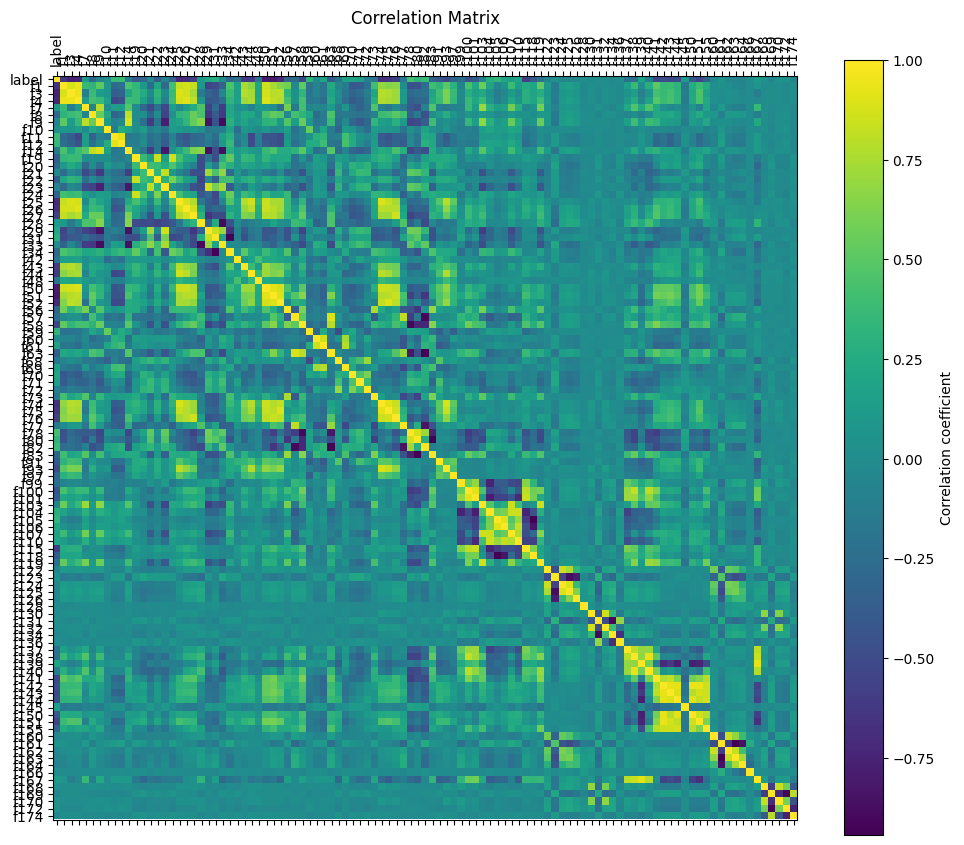

In [31]:
plot_correlation_matrix(dataset)

### Escalado de datos

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('label', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=dataset.columns[1::])
scaled_data.head()

,f1,f2,f3,f4,f5,f7,f8,f9,f10,f11,...,f161,f162,f164,f166,f167,f168,f169,f170,f172,f174
0,-1.288477,-1.775459,-1.003780,-1.292797,-1.192080,-0.297444,-0.619232,-0.996738,-0.268253,0.304247,...,-1.332261,1.836527,1.557351,0.788961,5.538626,19.484834,-5.224165,21.155690,2.289170,0.056056
1,-0.807184,-1.026173,-0.394774,-0.577567,-0.638943,-0.497744,-0.239699,-0.923226,0.230673,-0.069971,...,-2.063760,0.702092,0.395105,-1.939060,1.542126,-0.060611,-0.592405,0.239791,0.689419,-1.741115
2,-0.571306,-0.723524,-0.197831,-0.235333,-0.460361,-0.459710,-0.165700,-0.800592,0.824353,-0.415732,...,-1.112831,0.134905,0.685620,-0.274435,1.679923,0.184732,-1.834904,1.470145,1.508908,-1.114897
3,-0.735340,-0.462812,-0.169956,-0.076393,-0.612189,-0.704556,0.597351,-0.430547,1.398294,-1.029511,...,-1.112831,0.134905,1.667143,0.140366,4.022729,0.675419,-0.592405,0.239791,1.269614,-0.451615
4,-0.733432,-0.287373,-0.043004,0.078702,-0.529252,-0.870521,0.896366,-0.384023,1.847925,-1.182924,...,-1.405405,1.042494,1.376440,-0.056334,3.884932,1.084297,-1.834904,1.470145,2.103954,-0.272644


## Separación de datos de entrenamiento y prueba

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, dataset['label'], test_size=0.25, random_state=0)

In [16]:
y_train.unique()

array([1])

# Entrenamiento

In [15]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

ValueError: The number of classes has to be greater than one; got 1 class